#### Multiclass classification using scikit-learn

#### This title (and other documents like it) may be the reason for my confusion.  What's happening in here is 'multilabel' classification not multiclass.  In these problems we have a single target column that contains multiple labels.  Does that make it multiclass?  Maybe.

####  I need to redo this code, but with multiple outputs and see what breaks (I suspect show_metrics).  One way to do that might be to just clone the y_test, hstack it.  That would then be multiple targets.

#### Lightbulb emoji.  Actually all I need to do to test multi-output, multi-label is one-hot encode the target.  Then I have 3 outputs with binary labels (0, 1).  See 'multioutput_classifiers'.


This is like one piece of what I'm doing.  I have 9 outputs, all with multiple labels ("classes").  

What I'm doing here is seeing exactly what various metrics do.  

Note: original code from here: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/ with my additions.

### Need a function to do the reporting.   

* We need to predict targets for some metrics, but we also need probabilties for log_loss

I want the following metrics:

* accuracy
* classification report - includes precision, recall and F1 score
* confusion matrix plot


#### To figure out everything about what's going on, it would seem that I need to see what these classifiers output for a) predictions and b) probabilities if y is one-hot encoded.

In [1]:
# importing necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score

In [3]:
def plot_cm(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(np.arange(cm.shape[0])); 
    ax.yaxis.set_ticklabels(np.arange(cm.shape[0]));

In [4]:
def show_metrics(y, yhat, y_probas):
    print('Accuracy score: {:.4f}'.format(accuracy_score(y, yhat)))
    print('log_loss:       {:.4f}'.format(log_loss(y, y_probas)))
    print('Classification Report\n', classification_report(y, yhat))
    plot_cm(confusion_matrix(y, yhat))    

### Load the dataset and split into training and test sets

In [5]:
# loading the iris dataset
iris = datasets.load_iris()
 
# X -> features, y -> label
X = iris.data
y = iris.target

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

### Dtree classifier

In [6]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_probas = dtree_model.predict_proba(X_test)
cm = confusion_matrix(y_test, dtree_predictions)

In [7]:
cm.shape

(3, 3)

In [8]:
dtree_probas[0]

array([0.        , 0.02564103, 0.97435897])

Accuracy score: 0.8947
log_loss:       0.3310
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.83      0.94      0.88        16
          2       0.86      0.67      0.75         9

avg / total       0.90      0.89      0.89        38



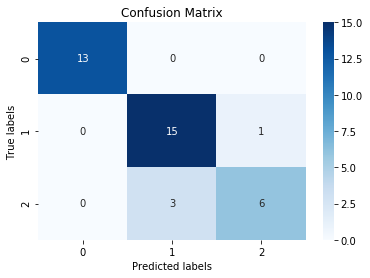

In [9]:
show_metrics(y_test, dtree_predictions, dtree_probas)

#### SVM (Support vector machine) classifier

SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. 
In sci-kit learn, we can specify the the kernel function (here, linear). 
To know more about kernel functions and SVM refer – Kernel function | sci-kit learn and SVM.

In [10]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1, probability=True).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
svm_probas = svm_model_linear.predict_proba(X_test)

Accuracy score: 0.9737
log_loss:       0.1303
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



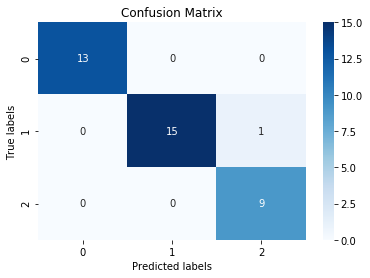

In [11]:
show_metrics(y_test, svm_predictions, svm_probas)

#### KNN (k-nearest neighbours) classifier 

KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [12]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
knn_probas = knn.predict_proba(X_test)

Accuracy score: 0.9737
log_loss:       0.1021
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



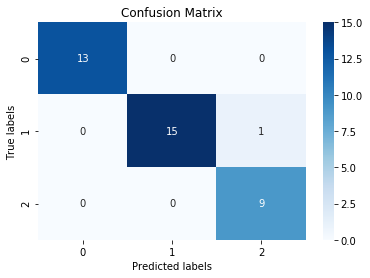

In [13]:
show_metrics(y_test, knn_predictions, knn_probas)

### Naive Bayes classifier

Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector.

In [14]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_probas = gnb.predict_proba(X_test) 

Accuracy score: 1.0000
log_loss:       0.0513
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38



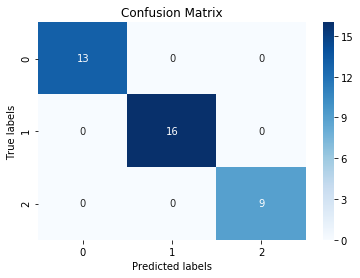

In [15]:
show_metrics(y_test, gnb_predictions, gnb_probas)

In [16]:
y_test[:5]

array([2, 1, 0, 2, 0])

In [17]:
gnb_probas

array([[3.78600393e-230, 1.23816844e-006, 9.99998762e-001],
       [3.92599599e-084, 9.99998414e-001, 1.58647449e-006],
       [1.00000000e+000, 1.49614564e-018, 1.74760052e-027],
       [3.15666262e-310, 5.33743814e-007, 9.99999466e-001],
       [1.00000000e+000, 9.42168027e-017, 1.23200067e-026],
       [2.23021233e-320, 6.57075840e-011, 1.00000000e+000],
       [1.00000000e+000, 1.08515841e-016, 1.60182246e-026],
       [2.77799567e-148, 7.80950359e-001, 2.19049641e-001],
       [3.06136988e-152, 9.10103555e-001, 8.98964447e-002],
       [7.81436720e-094, 9.99887821e-001, 1.12179234e-004],
       [4.04457884e-214, 4.59787449e-001, 5.40212551e-001],
       [5.58268067e-133, 9.46482991e-001, 5.35170089e-002],
       [2.01640272e-134, 9.98906155e-001, 1.09384481e-003],
       [5.62315541e-141, 9.50340361e-001, 4.96596389e-002],
       [6.95450261e-142, 9.87982897e-001, 1.20171030e-002],
       [1.00000000e+000, 4.12311724e-017, 2.59560830e-027],
       [4.37029216e-132, 9.87665084e-001

#### I want to see if logistic regression will act like the above or do I need to give it something non-default so it knows do multilabel.

Logistic regression is fine with accepting multilabel targets.

In [18]:
# train logistic regression classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
logreg_predictions = gnb.predict(X_test)
logreg_probas = gnb.predict_proba(X_test) 

Accuracy score: 1.0000
log_loss:       0.0513
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38



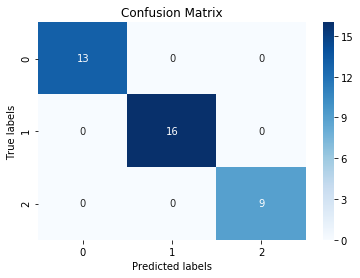

In [19]:
show_metrics(y_test, logreg_predictions, logreg_probas)

In [20]:
# train logistic regression classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
rf_predictions = gnb.predict(X_test)
rf_probas = gnb.predict_proba(X_test) 

Accuracy score: 1.0000
log_loss:       0.0513
Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38



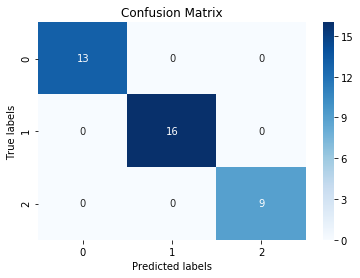

In [21]:
show_metrics(y_test, rf_predictions, rf_probas)

In [22]:
type(rf_probas)

numpy.ndarray

### What format is the output of clf.predict_proba?

In [23]:
all_probas = [dtree_probas, svm_probas, gnb_probas, logreg_probas, rf_probas]

In [24]:
[type(x) for x in all_probas]

[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]

In [25]:
[x.shape for x in all_probas]

[(38, 3), (38, 3), (38, 3), (38, 3), (38, 3)]

#### Okay, I think I have it now.  Random forest clf is inherently multi-output, multi-label and its probability output format is different if you give it a multi-column target (list of array of probabilities for each label). 

#### I'm not sure what happens is you give it a standard (single-output) multiclass target.   

#### Random forest does the same thing as all the rest.  It may be that some of these will accept multiple target colums (along with rfc).  If they 


__==============================================================================__

#### This is how to go from dummy columns back to category

In [26]:
import pandas as pd

In [27]:
s = pd.Series(['a', 'b', 'a', 'c'])

In [28]:
s

0    a
1    b
2    a
3    c
dtype: object

In [29]:
dummies = pd.get_dummies(s)

In [30]:
dummies

,a,b,c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [31]:
type(dummies)

pandas.core.frame.DataFrame

In [32]:
s2 = dummies.idxmax(axis=1)

In [33]:
s2

0    a
1    b
2    a
3    c
dtype: object

In [34]:
(s2 == s).all()

True